### Student Information
Name: 楊皓崴

Student ID: 109062526

GitHub ID: hwyang

---
### Instructions
1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

### Part one
---

In [1]:
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
#Answer here

#selection by callable
X.loc[lambda x: x['category'] == 1, lambda x: ['category', 'category_name']] #specify target value, specify column wanted
X.iloc[lambda x: [0, 2], lambda x: [1,2]]
X.iloc[[0,2], X.columns.get_indexer(['category', 'category_name'])] #equal to X.iloc[lambda x: [0, 2], lambda x: [1,2]]

# Boolean indexing
X[X['category'] == 2] # useful, easier than first one
X[X.index.isin([0,2])].iloc[:, lambda x: [1,2]] # same as second one

# where and masking
X.where(X['category'] == 2) #same as boolean indexing but return with same shape
X.where(X['category'] == 2, 2) #replacement if condition false
X.mask(X['category'] == 2) # inverse of where

# query
X.query('index == category') #accept expr

text  category  \
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
1           comp.graphics  
3  soc.religion.christian

---
### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [4]:
# Answer here

# ans: 
# the reason why isnull() is not working is that 'anything' is consider as a string type therefore it's not a None type or np.nan
# so i convert value of ''/'None'/'NaN' to NaN then isnull() can work
NA_df = NA_df.replace('', np.nan)
NA_df = NA_df.replace('None', np.nan)
NA_df = NA_df.replace('NaN', np.nan)
NA_df['miss'] = NA_df['missing_example'].isnull()
NA_df

id  missing_example  miss
0  A              NaN  True
1  B              NaN  True
2  C              NaN  True
3  D              NaN  True
4  E              NaN  True
5  F              NaN  True

---

In [5]:
X_sample = X.sample(n=1000, random_state=0)
print(len(X_sample))
print(X_sample[0:4])

1000
                                                   text  category  \
1604  From: ss6349@csc.albany.edu (Steven H. Schimmr...         3   
1036  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2144  From: berger@chaos.cs.brandeis.edu (David Berg...         1   
1170  From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...         2   

               category_name  
1604  soc.religion.christian  
1036                 sci.med  
2144           comp.graphics  
1170                 sci.med  


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
# Answer here

# ans:
# X_sample has random order of selected rows and the size is smaller than X
print(X_sample)

                                                   text  category  \
1604  From: ss6349@csc.albany.edu (Steven H. Schimmr...         3   
1036  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2144  From: berger@chaos.cs.brandeis.edu (David Berg...         1   
1170  From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...         2   
124   From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
...                                                 ...       ...   
1101  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
231   From: drt@athena.mit.edu (David R Tucker) Subj...         3   
377   From: sschaff@roc.slac.stanford.edu (Stephen F...         3   
1444  From: jchen@wind.bellcore.com (Jason Chen) Sub...         2   
862   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

               category_name  
1604  soc.religion.christian  
1036                 sci.med  
2144           comp.graphics  
1170                 sci.med  
124   soc.religi

---
### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. [pic](https://i.imgur.com/9eO431H.png)

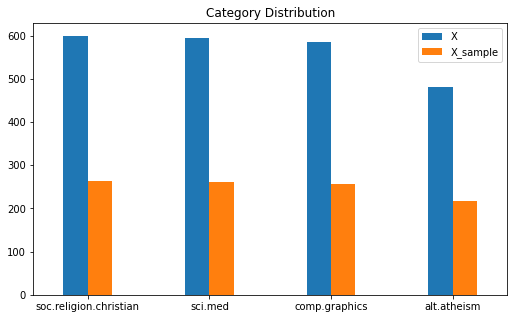

In [7]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

blue_bar = X.category_name.value_counts()
orange_bar = X_sample.category_name.value_counts()
index = X.category_name.value_counts().index.to_list()
df = pd.DataFrame({'X': blue_bar, 'X_sample': orange_bar}, index=index) #construct a new dataframe with two columns then i can show them together
ax = df.plot.bar(width = 0.4, title = 'Category Distribution', rot = 0, figsize = (8.5, 5))

---

In [8]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
#analyze("Hello World!")
#" ".join(list(X[4:5].text))

## **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [9]:
# Answer here
find_one = np.where(X_counts[4, 0:100].toarray() == 1) # use where() to find value 1
index_number = find_one[1][1] # access the index
ans = count_vect.get_feature_names()[index_number] # access the column name by the index
print('Another one in the record represent "{}" in the vocabulary'.format(ans))

Another one in the record represent "01" in the vocabulary


---

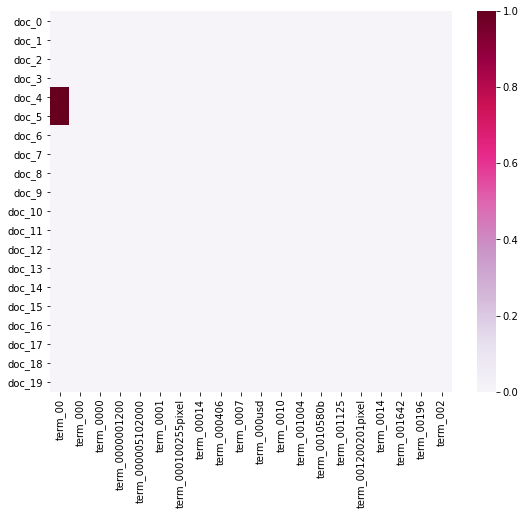

In [10]:
import seaborn as sns
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
#ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
ax = sns.heatmap(df_todraw, cmap="PuRd")

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

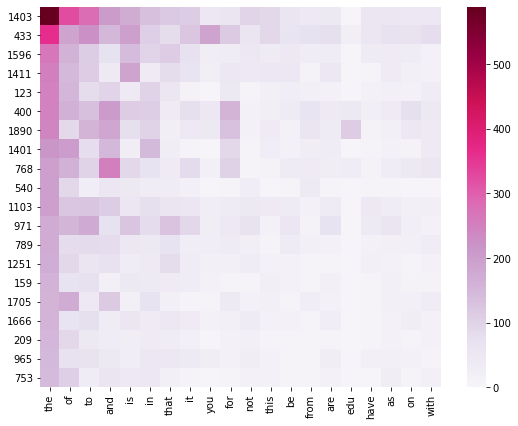

In [11]:
# Answer here
import seaborn as sns

count_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names()[:], index = list(X.index)[:]) #count_df is the same as X_counts but a dataframe

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
freq_df = pd.DataFrame([term_frequencies[:]], columns=count_vect.get_feature_names()[:], index = ['total']) #each col in freq_df record total occurrance of term
count_df = count_df.append(freq_df) # add this row to count_df
count_df = count_df.sort_values(by = 'total', axis = 1, ascending=False) #sort by total occurrance so those terms that appear more will be ploted
count_df = count_df.sort_values(by = count_df.columns[0], axis = 0, ascending=False) # sort by most occurrance term in documents
count_df = count_df.drop(index = 'total') #drop row total

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(count_df.iloc[:20, :20], cmap="PuRd")

---
### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

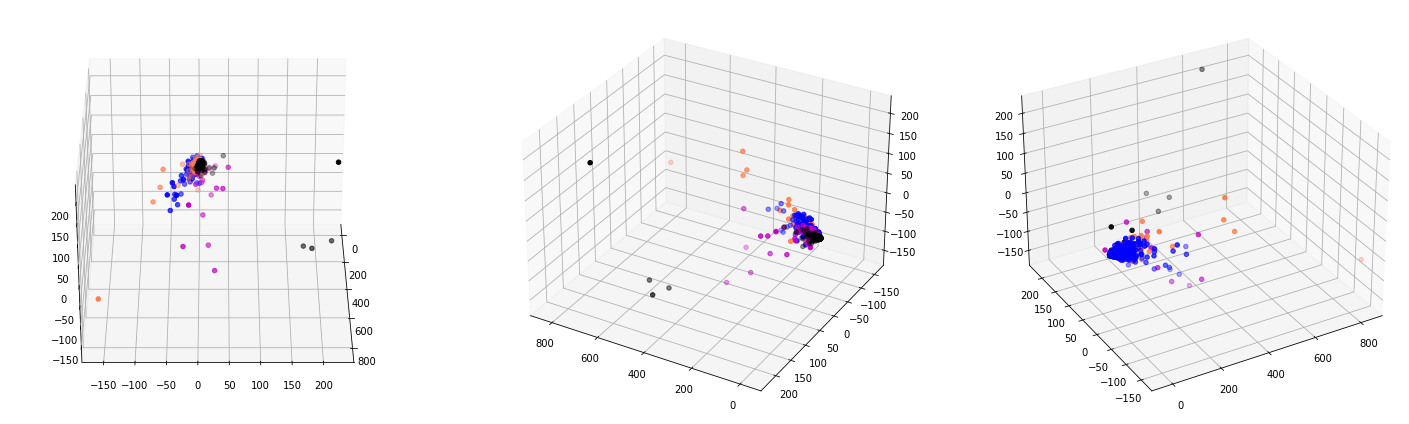

In [12]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray()) # 3 dimension
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
ax1 = fig.add_subplot(131, projection='3d', azim = 0) #to show in 3 different angle set azim = 0/120/240
ax2 = fig.add_subplot(132, projection='3d', azim = 120)
ax3 = fig.add_subplot(133, projection='3d', azim = 240)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

# describe what I found:
# the data points can perhaps be separated by 2-d plane now.
# since it seems like the black ones are above purple ones, followed by blue ones then its the orange ones.
# so maybe reduce the dimension too much is not that good.

---

In [13]:
#term_frequencies = []
#for j in range(0,X_counts.shape[1]):
#    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [14]:
# Answer here
import plotly.graph_objects as go
layout = go.Layout(xaxis=dict(type='category')) # to ensure that plotly will not change x-axis label from string to int 
                                                # (since the term 00, 000406 ...etc are numbers)
fig = go.Figure([go.Bar(x = count_vect.get_feature_names()[:300], y = term_frequencies[:300])], layout = layout)
fig.show()


---
### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [15]:
# Answer here
import plotly.graph_objects as go
import plotly.express as px
# try to show only the top number of appearance terms of all terms
freq_df = pd.DataFrame([term_frequencies[:]], columns=count_vect.get_feature_names()[:], index = ['0']) # create a df type so i can use sort_values()
freq_df = freq_df.sort_values(by = '0', axis = 1, ascending=False) #sort first so i can only render the terms with more apperance
fig = go.Figure([go.Bar(x = freq_df.columns[:100], y = freq_df.values[0][:100])], layout = go.Layout(xaxis=dict(type='category')))
fig.show()

---
### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below [pic](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [16]:
# Answer here
# apper to be the same thought as i want to do in the above exercise (efficiently reduce the number of terms) so i just write the same thing here
import plotly.graph_objects as go
import plotly.express as px

freq_df = pd.DataFrame([term_frequencies[:]], columns=count_vect.get_feature_names()[:], index = ['0'])
freq_df = freq_df.sort_values(by = '0', axis = 1, ascending=False)
fig = go.Figure([go.Bar(x = freq_df.columns[:300], y = freq_df.values[0][:300])], layout = go.Layout(xaxis=dict(type='category')))
fig.show()

In [17]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
import plotly.graph_objects as go
import plotly.express as px

freq_df = pd.DataFrame([term_frequencies_log[:]], columns=count_vect.get_feature_names()[:], index = ['0']) #use log
freq_df = freq_df.sort_values(by = '0', axis = 1, ascending=False)
fig = go.Figure([go.Bar(x = freq_df.columns[:300], y = freq_df.values[0][:300])], layout = go.Layout(xaxis=dict(type='category')))
fig.show()

---

In [18]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
# mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [19]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X

# ans: yes, it works.

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  \
0              comp.graphics   
1              comp.graphics   
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
...                      ...   
2252                 sci.med   
2253                 sci.med   
2254                 sci.med   
2255                 sci.med   
2256                 sci.med   

                                               unigrams  bin_category  \
0     [From, :, sd345, @, city.ac.uk, (, Michael, Co...  [0, 1, 0, 0]   
1     [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  [0, 1, 0, 0]   
2     [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  [0, 0, 0, 1]   
3     [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  [0, 0, 0, 1]   
4     [From, :, stanly, @, grok11.columbiasc.ncr.com...  [0, 0, 0, 1]   
...                                                 ...           ...   
2252  [From, :, roos, @, Operoni.Helsinki.FI, (, Chr...  [0, 0, 1, 0]   
2253  [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...  [0, 0, 1, 0]   
2254  [From, :, sasghm, @, theseus.unx.sas.com, (, G...  [0, 0, 1, 0]   
2255  [From, :, Dan, Wallach, <, dwallach, @, cs.ber...  [0, 0, 1, 0]   
2256  [From, :, dyer, @, spdcc.com, (, Steve, Dyer, ...  [0, 0, 1, 0]   

     bin_category_name  
0         [0, 1, 0, 0]  
1         [0, 1, 0, 0]  
2         [0, 0, 0, 1]  
3         [0, 0, 0, 1]  
4         [0, 0, 0, 1]  
...                ...  
2252      [0, 0, 1, 0]  
2253      [0, 0, 1, 0]  
2254      [0, 0, 1, 0]  
2255      [0, 0, 1, 0]  
2256      [0, 0, 1, 0]  

[2257 rows x 6 columns]

### Part2: follow the steps in lab1
---


In [20]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import nltk
import numpy as np
%matplotlib inline

def extract_data(file_name = ''):  # define a function for easy use of extracting data from .txt
    file_name = 'sentiment labelled sentences/{}.txt'.format(file_name)
    file = open(file_name, "r")
    for line in file.readlines():
        line = line.strip()
        score = line[-1:]  #take the last word as score
        sentence = line[:-1].strip()
        sentences.append(sentence)
        scores.append(int(score))
    file.close()

sentences = []
scores = []
extract_data('amazon_cells_labelled')
extract_data('yelp_labelled')
extract_data('imdb_labelled')

X = pd.DataFrame()  #create a main dataframe which have two columns each containing sentence and score
X['sentence'] = sentences

In [21]:
len(X)

3000

In [22]:
X[0:2]

sentence
0  So there is no way for me to plug it in here i...
1                        Good case, Excellent value.

In [23]:
for t in X["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [24]:
# add category to the dataframe
X['score'] = scores

In [25]:
# add category label also
X['score_name'] = X.score.apply(lambda t: 'positive' if t == 1 else 'negative')

In [26]:
X[0:10]

sentence  score score_name
0  So there is no way for me to plug it in here i...      0   negative
1                        Good case, Excellent value.      1   positive
2                             Great for the jawbone.      1   positive
3  Tied to charger for conversations lasting more...      0   negative
4                                  The mic is great.      1   positive
5  I have to jiggle the plug to get it to line up...      0   negative
6  If you have several dozen or several hundred c...      0   negative
7        If you are Razr owner...you must have this!      1   positive
8                Needless to say, I wasted my money.      0   negative
9                   What a waste of money and time!.      0   negative

In [27]:
# a simple query
X[0:10][["sentence", "score_name"]]

sentence score_name
0  So there is no way for me to plug it in here i...   negative
1                        Good case, Excellent value.   positive
2                             Great for the jawbone.   positive
3  Tied to charger for conversations lasting more...   negative
4                                  The mic is great.   positive
5  I have to jiggle the plug to get it to line up...   negative
6  If you have several dozen or several hundred c...   negative
7        If you are Razr owner...you must have this!   positive
8                Needless to say, I wasted my money.   negative
9                   What a waste of money and time!.   negative

In [28]:
X[-10:]

sentence  score score_name
2990  The opening sequence of this gem is a classic,...      1   positive
2991               Fans of the genre will be in heaven.      1   positive
2992                  Lange had become a great actress.      1   positive
2993                  It looked like a wonderful story.      1   positive
2994              I never walked out of a movie faster.      0   negative
2995  I just got bored watching Jessice Lange take h...      0   negative
2996  Unfortunately, any virtue in this film's produ...      0   negative
2997                     In a word, it is embarrassing.      0   negative
2998                                 Exceptionally bad!      0   negative
2999  All in all its an insult to one's intelligence...      0   negative

In [29]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

sentence  score
0   So there is no way for me to plug it in here i...      0
10                    And the sound quality is great.      1
20  I went on Motorola's website and followed all ...      0
30  This is a simple little phone to use, but the ...      0
40  It has a great camera thats 2MP, and the pics ...      1
50  Not loud enough and doesn't turn on like it sh...      0
60  Essentially you can forget Microsoft's tech su...      0
70                                  Mic Doesn't work.      0
80      I wear it everyday and it holds up very well.      1
90  For a product that costs as much as this one d...      0

In [30]:
# using loc (by label)
X.loc[::10, 'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [31]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

sentence  score score_name
0   So there is no way for me to plug it in here i...      0   negative
10                    And the sound quality is great.      1   positive
20  I went on Motorola's website and followed all ...      0   negative
30  This is a simple little phone to use, but the ...      0   negative
40  It has a great camera thats 2MP, and the pics ...      1   positive
50  Not loud enough and doesn't turn on like it sh...      0   negative
60  Essentially you can forget Microsoft's tech su...      0   negative
70                                  Mic Doesn't work.      0   negative
80      I wear it everyday and it holds up very well.      1   positive
90  For a product that costs as much as this one d...      0   negative

In [32]:
#try different way of query
#selection by callable
X.loc[lambda x: x['score'] == 1, lambda x: ['score', 'score_name']] #specify target value, specify column wanted
X.iloc[lambda x: [0, 2], lambda x: [1,2]]
X.iloc[[0,2], X.columns.get_indexer(['score', 'score_name'])] #equal to X.iloc[lambda x: [0, 2], lambda x: [1,2]]
# Boolean indexing
X[X['score'] == 1] # useful, easier than first one
X[X.index.isin([0,2])].iloc[:, lambda x: [1,2]] # same as second one
# where and masking
X.where(X['score'] == 2) #same as boolean indexing but return with same shape
X.where(X['score'] == 2, 2) #replacement if condition false
X.mask(X['score'] == 2) # inverse of where
# query
X.query('index == score') #accept expr

sentence  score score_name
0  So there is no way for me to plug it in here i...      0   negative
1                        Good case, Excellent value.      1   positive

In [33]:
# Answer here
X.loc[lambda f: f.score_name == 'negative'].iloc[::10, 0,][:5]

0     So there is no way for me to plug it in here i...
20    I went on Motorola's website and followed all ...
37                          Poor Talk Time Performance.
60    Essentially you can forget Microsoft's tech su...
83                       The battery runs down quickly.
Name: sentence, dtype: object

In [34]:
X.isnull()

sentence  score  score_name
0        False  False       False
1        False  False       False
2        False  False       False
3        False  False       False
4        False  False       False
...        ...    ...         ...
2995     False  False       False
2996     False  False       False
2997     False  False       False
2998     False  False       False
2999     False  False       False

[3000 rows x 3 columns]

In [35]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   0

In [36]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [37]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [38]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [39]:
result_with_series = X.append(dummy_series, ignore_index=True)
# check if the records was commited into result
len(result_with_series)

3001

In [40]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   1

In [41]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [42]:
X = X.append(dummy_dict, ignore_index=True)

In [43]:
len(X)

3001

In [44]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   1

In [45]:
X.dropna(inplace=True)

In [46]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   0

In [47]:
len(X)

3000

In [48]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [49]:
sum(X.duplicated())

18

In [50]:
sum(X.duplicated('sentence'))

18

In [51]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                             'score_name': "dummy score"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                             'score_name': "dummy score"
                        }]

In [52]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [53]:
len(X)

3002

In [54]:
sum(X.duplicated('sentence'))

19

In [55]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [56]:
len(X) #now the duplicate data in X are drop out

2964

In [57]:
X_sample = X.sample(n=1000, random_state=0) #set andom state to ensure reproductivity
print(len(X_sample))
X_sample[0:4]

1000


sentence  score score_name
2370    The jerky camera movements were also annoying.      0   negative
658               Talk about USELESS customer service.      0   negative
119                 )Setup couldn't have been simpler.      1   positive
256   The cable looks so thin and flimsy, it is scary.      0   negative

negative    1484
positive    1480
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'score distribution'}>

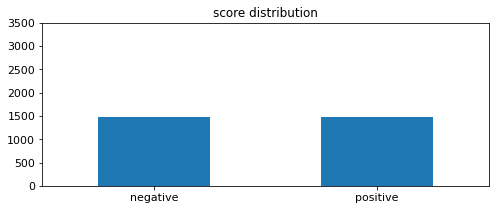

In [58]:
print(X.score_name.value_counts())

# plot barchart for X_sample
X.score_name.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',
                                    ylim = [0, 3500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

positive    504
negative    496
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

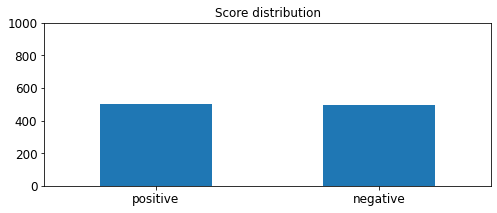

In [59]:
print(X_sample.score_name.value_counts())

# plot barchart for X_sample
X_sample.score_name.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, 1000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

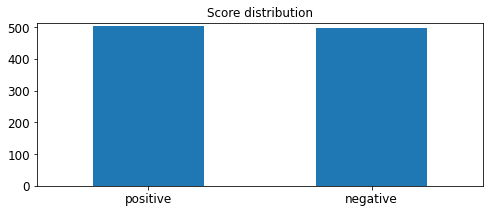

In [60]:
# Answer here
upperbound = max(X_sample.score_name.value_counts())+10
# plot barchart for X_sample
p = X_sample.score_name.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, upperbound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

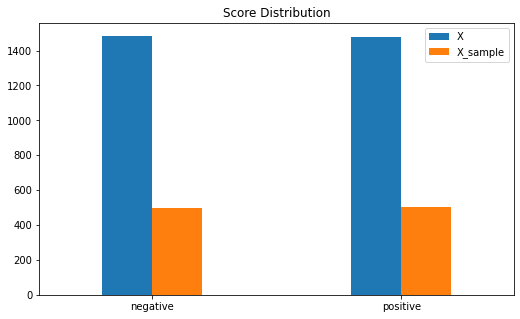

In [61]:
blue_bar = X.score_name.value_counts()
orange_bar = X_sample.score_name.value_counts()
index = X.score_name.value_counts().index.to_list()
df = pd.DataFrame({'X': blue_bar, 'X_sample': orange_bar}, index=index) #construct a new dataframe with two columns then i can show them together
ax = df.plot.bar(width = 0.4, title = 'Score Distribution', rot = 0, figsize = (8.5, 5))

In [62]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [63]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [64]:
X[0:4]

sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [65]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [67]:
analyze = count_vect.build_analyzer()
analyze(X["sentence"][0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [68]:
# We can check the shape of this matrix by:
X_counts.shape

(2964, 5153)

In [69]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [70]:
X[0:5]

sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]

In [71]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [72]:
# Answer here
find_one = np.where(X_counts[3, 0:100].toarray() == 1) #use where() to find value 1
index_number = find_one[1][0] #access the index
ans = count_vect.get_feature_names()[index_number]
print('the one in the 4th record represent "{}" in the vocabulary'.format(ans))

the one in the 4th record represent "45" in the vocabulary


In [73]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [74]:
# obtain document index
plot_y = ["sentence_"+ str(i) for i in list(X.index)[0:20]]

In [75]:
plot_z = X_counts[0:20, 0:20].toarray()

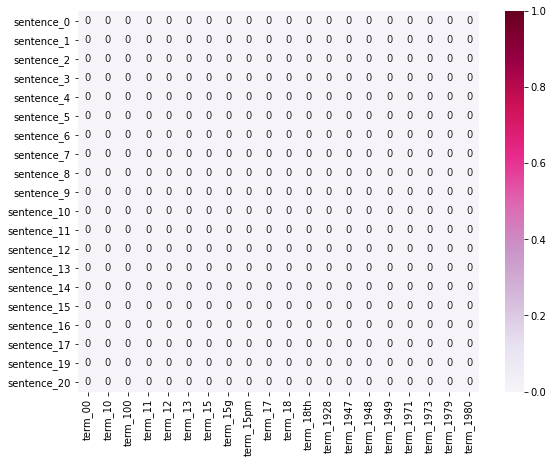

In [76]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

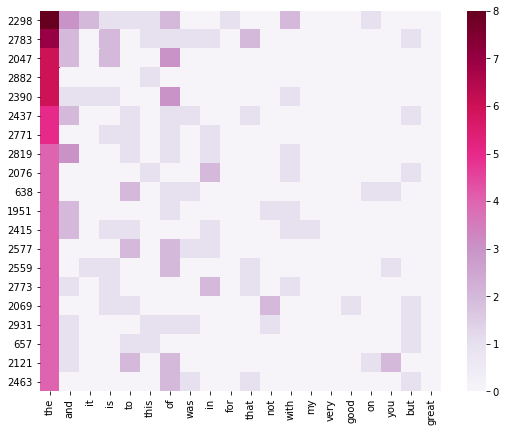

In [77]:
# ex 11 
# Answer here
import seaborn as sns

count_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names()[:], index = list(X.index)[:]) #count_df is the same as X_counts but a dataframe

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
freq_df = pd.DataFrame([term_frequencies[:]], columns=count_vect.get_feature_names()[:], index = ['total']) #each col in freq_df record total occurrance of term
count_df = count_df.append(freq_df) # add this row to count_df
count_df = count_df.sort_values(by = 'total', axis = 1, ascending=False) #sort by total occurrance so those terms that appear more will be ploted
count_df = count_df.sort_values(by = count_df.columns[0], axis = 0, ascending=False) # sort by most occurrance term in documents
count_df = count_df.drop(index = 'total') #drop row total

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(count_df.iloc[:20, :20], cmap="PuRd")

In [78]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2964, 2)

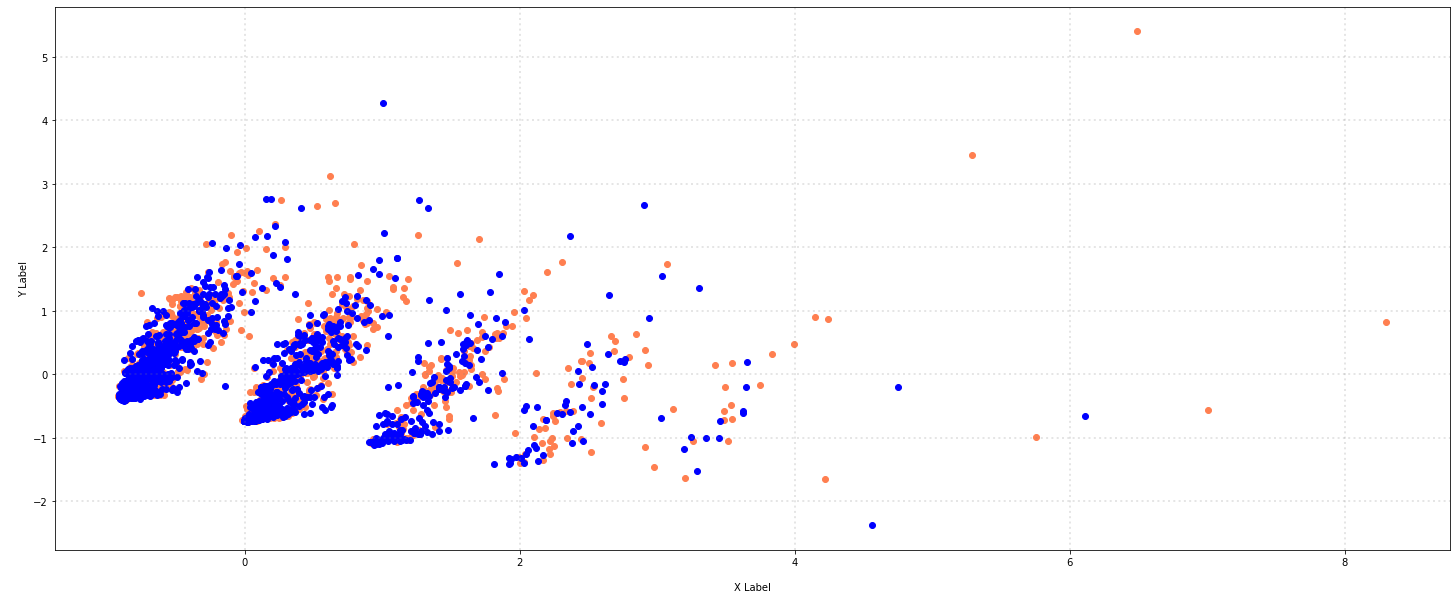

In [79]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, ['positive', 'negative']):
    xs = X_reduced[X['score_name'] == s].T[0]
    ys = X_reduced[X['score_name'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

# what i found in this graph:
# if reduce the dimension into 2 degrees, the data point cannot be well separated by simple classifer liker decision tree or svm
# since the dots are all sticked together. Therefore, maybe reduced the dimension into 3 or more can be much more easier to do classification

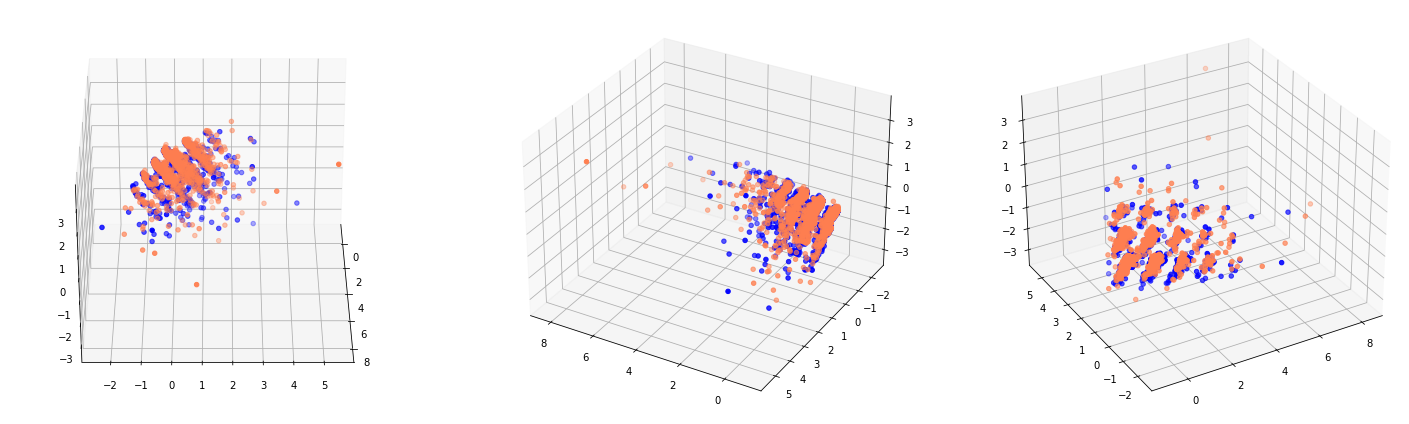

In [80]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray()) # 3 dimension
col = ['coral', 'blue']

fig = plt.figure(figsize = (25,10))
ax1 = fig.add_subplot(131, projection='3d', azim = 0) #to show in 3 different angle set azim = 0/120/240
ax2 = fig.add_subplot(132, projection='3d', azim = 120)
ax3 = fig.add_subplot(133, projection='3d', azim = 240)

for c, s in zip(col, ['positive', 'negative']):
    xs = X_reduced[X['score_name'] == s].T[0]
    ys = X_reduced[X['score_name'] == s].T[1]
    zs = X_reduced[X['score_name'] == s].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

# describe what I found:
# now the data points looks more likely to be separated by a 2-d plane by svm since the orange dots are above the blue ones.

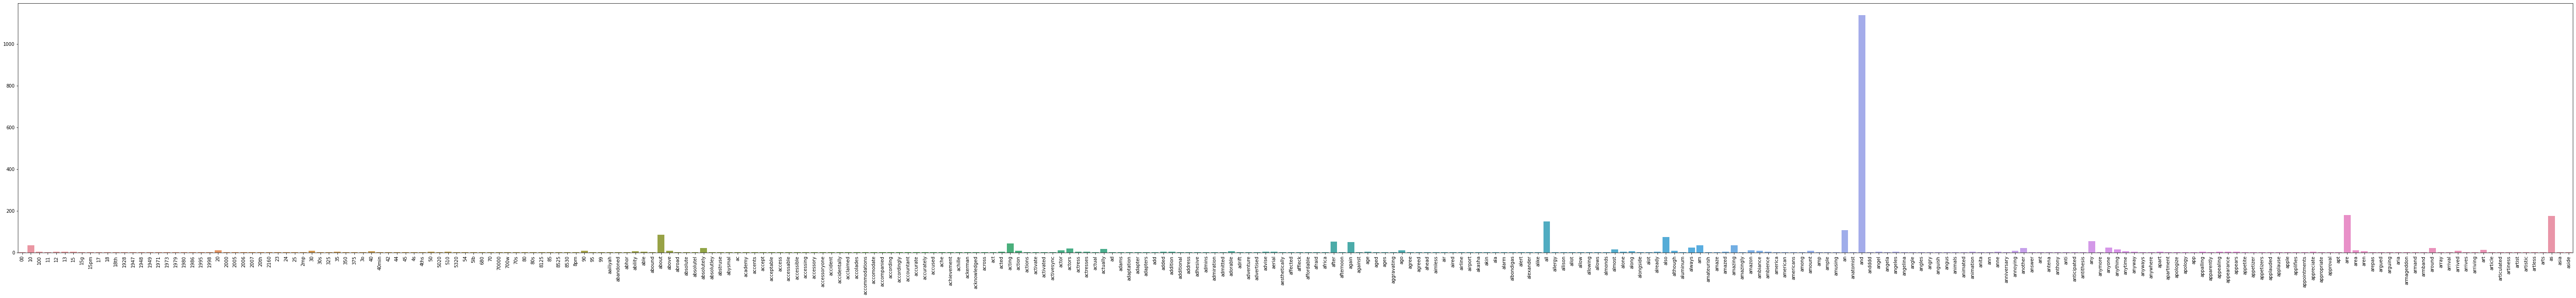

In [81]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] # aggregation
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [82]:
# ex 13
import plotly.graph_objects as go
#use plotly to draw an interactive plot
layout = go.Layout(xaxis=dict(type='category')) # to ensure that plotly will not change x-axis label from string to int
fig = go.Figure([go.Bar(x = count_vect.get_feature_names()[:300], y = term_frequencies[:300])], layout = layout)
fig.show()

In [83]:
# ex 14
import plotly.graph_objects as go
import plotly.express as px
# try to show only the top number of appearance terms of all terms
freq_df = pd.DataFrame([term_frequencies[:]], columns=count_vect.get_feature_names()[:], index = ['0']) # create a df type so i can use sort_values()
freq_df = freq_df.sort_values(by = '0', axis = 1, ascending=False) #sort first so i can only render the terms with more apperance
fig = go.Figure([go.Bar(x = freq_df.columns[:100], y = freq_df.values[0][:100])], layout = go.Layout(xaxis=dict(type='category')))
fig.show()

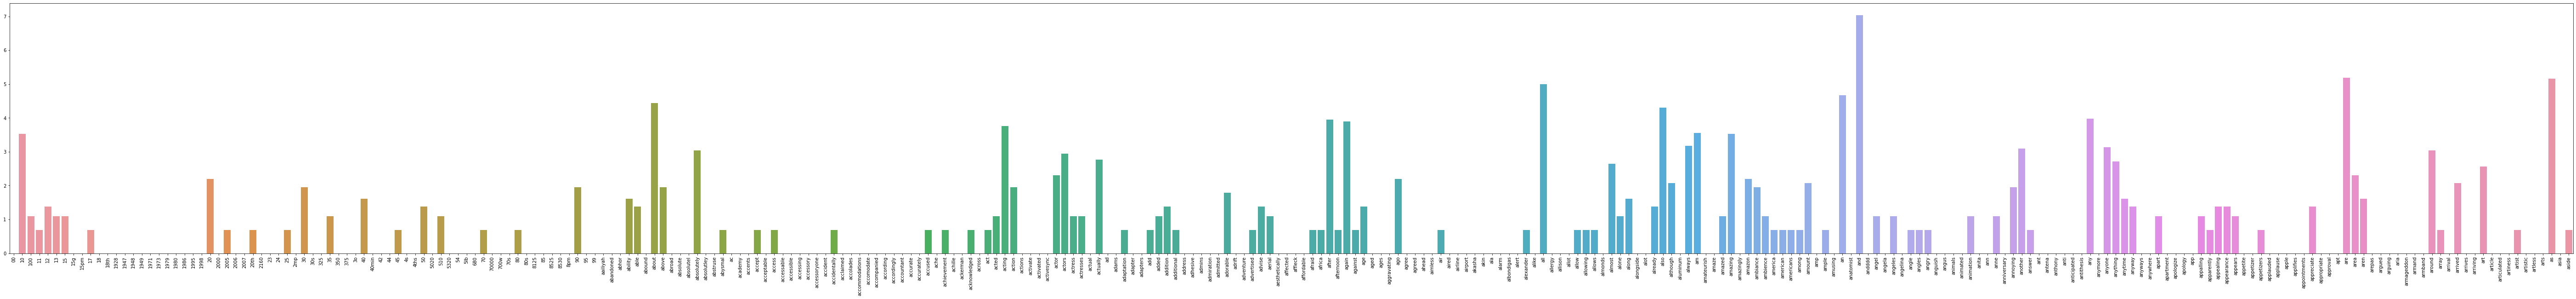

In [84]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [85]:
# try to show only the top number of appearance terms of all terms
freq_df = pd.DataFrame([term_frequencies_log[:]], columns=count_vect.get_feature_names()[:], index = ['0']) # create a df type so i can use sort_values()
freq_df = freq_df.sort_values(by = '0', axis = 1, ascending=False) #sort first so i can only render the terms with more apperance
fig = go.Figure([go.Bar(x = freq_df.columns[:100], y = freq_df.values[0][:100])], layout = go.Layout(xaxis=dict(type='category')))
fig.show()

In [86]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)
mlb.classes_

array([0, 1])

In [87]:
X['bin_score'] = mlb.transform(X['score']).tolist()
X[0:9]

sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   
5  I have to jiggle the plug to get it to line up...      0   negative   
6  If you have several dozen or several hundred c...      0   negative   
7        If you are Razr owner...you must have this!      1   positive   
8                Needless to say, I wasted my money.      0   negative   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

In [88]:
#ex 16
#use score_name to generate binary vector, still work
mlb.fit(X.score_name)
X['bin_score'] = mlb.transform(X['score_name']).tolist()
X[0:9]

sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   
5  I have to jiggle the plug to get it to line up...      0   negative   
6  If you have several dozen or several hundred c...      0   negative   
7        If you are Razr owner...you must have this!      1   positive   
8                Needless to say, I wasted my money.      0   negative   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

In [89]:
# data exploration
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [90]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### Part 3
---
generate meaningful visualization

(-0.5, 399.5, 199.5, -0.5)

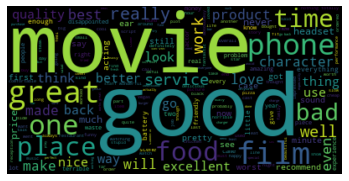

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# using wordcloud can easily visualize and recognize those words with high frequency
s = ''
for i in sentences:
    s += i

wordcloud = WordCloud().generate(s) # Generate a word cloud image

# Display
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")

#in this visualization, we can easily see that the word good, great, movie, film, phone, ... is high frequency words

### TF-IDF
---
Generate TF-IDF features from the tokens of each text.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tf is for term frequency (how often a word t appears in document d, higher means more important)
#idf is for inverse document frequency (inverse of frequency of a word t that appear in all documents, smaller idf means unimportant like the, and, a ...etc)
#tfidf is multiplication of these two
vectorizer = TfidfVectorizer()
TFIDF_matrix = vectorizer.fit_transform(X.sentence)

df_tfidf = pd.DataFrame(TFIDF_matrix.toarray(), columns = vectorizer.get_feature_names())
print(df_tfidf)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2959  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2960  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2961  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2962  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2963  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  


### Word frequency

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)
df_counts = pd.DataFrame(X_counts.toarray(), columns = count_vect.get_feature_names())
print(df_counts)

      00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2959   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2960   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2961   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2962   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2963   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0

### Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.
---

### Tfidf

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

feature, label = df_tfidf, X.score
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.5, random_state = 0)
gnb_1 = GaussianNB()
y_pred = gnb_1.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1482 points : 411


### word freq

In [96]:
feature, label = df_counts, X.score
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.5, random_state = 0)
gnb_2 = GaussianNB()
y_pred = gnb_2.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1482 points : 418


In [97]:
# comment on the difference

# tfidf punish those words(and or the but ...) with high frequency but appear in a lot of document by smaller idf. therefore, those words have less impact on the output feature vector
# those words also have less to do with the prediction of positive or negative sentence. therefore, tfidf can have a better performance than using simply tf although in this case the difference is not that large

---
### part 4: inefficient part

In [98]:
# 1. a lot of the visualization is not meaningful due to the fact that the matrix is sparse
# => required some preprocessing to data then do visualization
# 2. there are some redundant step like generating some dummy data and then delete them. but since the lab is a tutorial, it's understandable.
# 3. actually, we do not need the two columns category_name and category the same time. either one of them is enough since these two columns is basically one another
# 4. maybe do sampleing or even cross-validation to enhance classifier model performance